In [1]:
import os
import sys
sys.path.append('../../')

In [2]:
%%capture
%pip install ultralytics

In [3]:
from  ultralytics import YOLO
import numpy as np

In [4]:
model = YOLO("../../models/detect_lanes.pt")

In [5]:
img_path = "../../data/datasets/720p/scene1009.jpg"
predictions = model.predict(source=img_path, save=True, conf=0.5)


image 1/1 /home/romain/Documents/roadfollower/scripts/data/datasets/720p/scene1009.jpg: 384x640 2 white_lanes, 1 orange_lane, 58.4ms
Speed: 0.5ms preprocess, 58.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict8


In [6]:
def mask_from_pred(predictions, res_size):
    h,w = res_size
    binary = np.zeros((h, w), dtype='uint8')
    for i in range(len(predictions[0].masks.data)):
        binary += resize(np.array(predictions[0].masks.data[i]), (h,w)).astype('uint8')
        color_mask = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR) * 255
    return color_mask

In [8]:
import cv2
from skimage.transform import resize
import matplotlib.pyplot as plt
cap = cv2.VideoCapture("../../data/videos/video001.avi")

# Get the video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


# Create a video writer object to write the output video
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter("output_video.mp4", fourcc, fps, (width, height))

while True:
    # Read the next frame
    ret, frame = cap.read()

    # Break if we have reached the end of the video
    if not ret:
        break

    # Pass the frame to the YOLO model to make predictions
    predictions = model.predict(frame, conf=0.5)
    if predictions[0]:
        mask = mask_from_pred(predictions, (height, width))

    # Write the modified frame to the output video
    out.write(mask)

 # Release the video capture and video writer objects
cap.release()
out.release()   


0: 640x640 1 white_lane, 1 orange_lane, 81.1ms
Speed: 0.6ms preprocess, 81.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 white_lane, 1 orange_lane, 113.5ms
Speed: 47.0ms preprocess, 113.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 white_lane, 1 orange_lane, 98.1ms
Speed: 0.5ms preprocess, 98.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 white_lane, 1 orange_lane, 98.1ms
Speed: 1.1ms preprocess, 98.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 white_lane, 1 orange_lane, 89.1ms
Speed: 0.6ms preprocess, 89.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 white_lane, 1 orange_lane, 90.5ms
Speed: 0.6ms preprocess, 90.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 white_lane, 1 orange_lane, 86.8ms
Speed: 0.6ms preprocess, 86.8ms inference, 1.9ms postprocess per image at shape

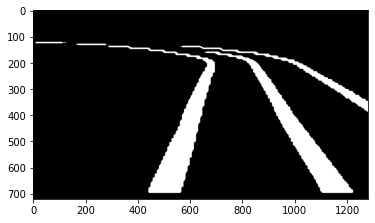

In [83]:


h,w,_ = plt.imread(img_path).shape

binary = np.zeros((h, w), dtype='uint8')
# binary = mask0 + mask1 + mask2
# mask = np.zeros((h, w), dtype='uint8')
for i in range(len(predictions[0].masks.data)):
    binary += resize(np.array(predictions[0].masks.data[i]), (h,w)).astype('uint8')
    
color_mask = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR) * 255
plt.imshow(color_mask, cmap="gray")



In [64]:
np.unique(binary)

array([0, 4, 5], dtype=uint8)